# Homework 2

## Akshay Prakash - arp3469

## Practicing Pandas


In [2]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Social Network Dataset

In this assignment we work with a social network dataset. 

You have 5 tables to work on. 

1. **person_knows_person**
This table represents the friendship between users. A person can have many friends. Persons have unique integer id number. 

2. **person_likes_post_file** 
This table represents user likes. A person and a post is represented by IDs. 

3. **post_hasCreator_person**
A person creates many posts. Each post has a unique creator person id. 

4. **comment_replyOf_post**
This table represents comments on posts. Both post and comments have unique ids. 

5. **comment_hasCreator_person** 
A user can comment on posts. Each comment has a unique creator person id. 


In [3]:
url = "https://raw.githubusercontent.com/kiat/Elements-of-Data-Analytics/main/datasets/social-media/"

person_knows_person_file = url + "person_knows_person.csv"
person_likes_post_file = url + "person_likes_post.csv"
post_hasCreator_person_file = url + "post_hasCreator_person.csv"
comment_replyOf_post_file = url + "comment_replyOf_post.csv"
comment_hasCreator_person_file = url + "comment_hasCreator_person.csv"

person_knows_person = pd.read_csv(person_knows_person_file,  sep='|')
person_likes_post = pd.read_csv(person_likes_post_file,  sep='|')
post_hasCreator_person = pd.read_csv(post_hasCreator_person_file,  sep='|')
comment_replyOf_post = pd.read_csv(comment_replyOf_post_file, sep='|')
comment_hasCreator_person = pd.read_csv(comment_hasCreator_person_file,  sep='|')

print(person_knows_person.head(5))
print("-------------------------")

print(person_likes_post.head(5))
print("-------------------------")

print(post_hasCreator_person.head(5))
print("-------------------------")

print(comment_replyOf_post.head(5))
print("-------------------------")

print(comment_hasCreator_person.head(5))
print("-------------------------")

   Person.id  Person.id.1
0         38          956
1         38          962
2         38          941
3         38           74
4         38           36
-------------------------
   Person.id  Post.id          creationDate
0         74        0  2012-10-15T05:13:41Z
1         36        0  2012-10-18T10:51:39Z
2        417       10  2012-11-18T11:14:47Z
3        415       10  2012-11-20T06:30:22Z
4        109       10  2012-11-19T11:03:52Z
-------------------------
   Post.id  Person.id
0        0         38
1       10         38
2       20         38
3       30         38
4       40         38
-------------------------
   Comment.id  Post.id
0           0        0
1          10        0
2          30        0
3          70        0
4         100       10
-------------------------
   Comment.id  Person.id
0           0         74
1          10        832
2          20        913
3          30        457
4          40        956
-------------------------


# Question - 1. Who are the top-10 users who have the highest number of friends? (4 points)
Count up the number of friends of each user and provide the top-10 of this number of friend count list. Print out their user IDs. 

In [4]:
person_knows_person["Person.id"].value_counts().nlargest(10)

336    99
959    99
40     99
430    98
811    98
296    98
938    98
804    97
165    97
323    96
Name: Person.id, dtype: int64

In [5]:
list(person_knows_person["Person.id"].value_counts().nlargest(10).index)

[336, 959, 40, 430, 811, 296, 938, 804, 165, 323]

# Question - 2. Who wrote the most liked post?  (4 points)
Count up the number of likes for each post and find out who wrote that post. 
Print out the user id. If there are multiple maximum print them all. 

In [6]:
post_likes = person_likes_post["Post.id"].value_counts().to_frame().rename(columns = {'index': "Post.id", "Post.id": "likes"})

In [7]:
most_likes = post_likes["likes"].max()

most_likes

9

In [11]:
most_liked_posts = post_likes[post_likes["likes"] == most_likes]
most_liked_posts

,likes
355680,9
1074970,9
128640,9
128650,9
401970,9
...,...
1236230,9
1490150,9
1490180,9
67350,9


In [12]:
most_liked_posts.index

Int64Index([ 355680, 1074970,  128640,  128650,  401970,  898150, 1620820,
            1620830,  128700,  642440,
            ...
             801940, 1242710, 1490110, 1276580,  549280, 1236230, 1490150,
            1490180,   67350, 1384930],
           dtype='int64', length=13158)

In [13]:
post_hasCreator_person.head()

,Post.id,Person.id
0,0,38
1,10,38
2,20,38
3,30,38
4,40,38


In [14]:
print(post_hasCreator_person[post_hasCreator_person["Post.id"].isin(most_liked_posts.index)]["Person.id"].drop_duplicates().values)

[ 38 941 347 495 884 336 405 135 587 863  43 875 861 422 514 746 728 548
 825 402 109 557  72 627 790 463 838  65 357  52 427 193 629 232 186 197
 585 429  28 732 318 635 393 654 105 659 189 643 668 556 383 532 326 970
 717 900 910 239 524 396 224 795 262  91 711 348 153 663 996 473 415 842
 762  86 731 919 685 505 353 965 712 945 564 122 959 997  36 510 278 675
  13 275 568 221  73 669 408 483 844 517 544 118  48 370 976 609 156 102
 333 770 569 630 451 542 911 430  83 979 896 297 394 182 828 882 878 529
 819   3 149  78 319 180 683 938 951   5 434 572 157 886 785 613 229 980
 778   4 476 491  11 715 942 280 835 986 661 834 545 780 674 858 876 658
 464 929 960 325 618 888 693 921 694 983 696 179 406 225  55 958 167 991
 767 250 480 899  21 943 772 166 987 786 565 366  99  71 814 446 745 699
 998 892 648  66 531 632 738  53  22 550 571 716 131 395 647 420 168 101
 344  31 908 640 651 682 973  64 266 417 426 274 570 191 680  41 155 859
 649 913 702  10 230 477 369 334 773 414 538 620 66

# Question - 3. Who wrote the most influential post? The most influential post is the most discussed and most liked post. (4 points)

**Tip:** First, count up the number of comments and likes that each post has. Then find out which post it is, and finally find out who wrote that. 
Print out one user id. 


In [15]:
post_comments = comment_replyOf_post["Post.id"].value_counts().to_frame().rename(columns = {'index' : "Post.id", 'Post.id' : "comments"})

post_comments.head()

,comments
445970,11
618370,10
1335410,10
675790,10
1289550,10


In [16]:
post_likes.size + post_comments.size

213715

In [17]:
post_value = pd.concat([post_likes, post_comments], axis = 1)

post_value = post_value.fillna(0)

post_value.head()

,likes,comments
0,2.0,4.0
10,5.0,5.0
20,9.0,3.0
30,4.0,3.0
40,7.0,4.0


In [18]:
# add a new feature 'interactivity'
post_value["interactivity"] = post_value["likes"] + post_value["comments"]

post_value.head()

,likes,comments,interactivity
0,2.0,4.0,6.0
10,5.0,5.0,10.0
20,9.0,3.0,12.0
30,4.0,3.0,7.0
40,7.0,4.0,11.0


In [19]:
# find the posts with the highest interactivity score
most_interacted_posts = np.array(post_value[ post_value["interactivity"] == post_value["interactivity"].max()].index)

print(most_interacted_posts)

[ 518820  727200  801730  888610 1246220 1424730]


In [20]:
print(post_hasCreator_person[post_hasCreator_person["Post.id"].isin(most_interacted_posts)]["Person.id"].values)

[325 649 794 245  15  23]


# Question - 4. Create two histograms for the distributions of the number of likes and comments that users have. (4 points)
Describe the shape of these data two data distributions. 

**Tip:** First perpare two lists of number of likes and number of comments that users have done. You need to count up how many likes and how many comments each unique user id has. 

In [23]:
user_comments = comment_hasCreator_person["Person.id"].value_counts().to_frame().rename(columns = {"index" : "Person.id" , "Person.id" : "comments"})

user_comments

,comments
135,3830
953,3678
959,3585
922,3555
40,3419
...,...
268,1
527,1
636,1
768,1


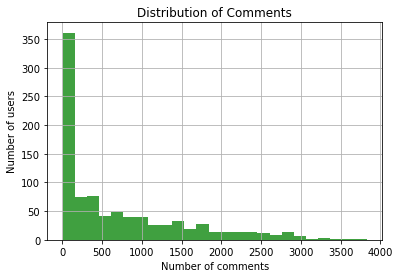

In [24]:
plt.hist(user_comments["comments"], 25, facecolor = "g" , alpha = 0.75)

plt.title("Distribution of Comments")
plt.xlabel("Number of comments")
plt.ylabel("Number of users")
plt.grid(True)
plt.show()

    The distribution of the number of likes appears to have a fatigue life distribution, or a left-skewed distribution. A majority of users have made fewer than 500 comments. The maximum number of comments appears to be between 3,500 and 4,000.

In [25]:
user_likes = person_likes_post["Person.id"].value_counts().to_frame().rename(columns = {"index" : "Person.id", "Person.id" : "likes"})

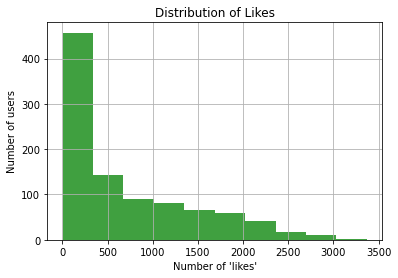

In [26]:
plt.hist(user_likes["likes"], facecolor = "g" , alpha = 0.75)

plt.title("Distribution of Likes")
plt.xlabel("Number of 'likes'")
plt.ylabel("Number of users")
plt.grid(True)
plt.show()

    The distribution of the number of likes appears to have a fatigue life distribution, or a left-skewed distribution. A majority of users have given less than 500 likes. 

# Question - 5. What is the Pearson correlation coefficient between the number of comments and the number of likes that users do on the social network? (4 points)

Print out one number. 



**Tip:** You can calculate correlation coefficient using the following formula: 
Assume that x and y are two arrays of data, in this case number of likes and comments of each user. 


\begin{align*}
r= {{ n(\sum x y ) - (\sum x ) (\sum y)    } \over { \sqrt{ [ n \sum x^2  -
(\sum x)^2 ] [ n\sum y^2 - (\sum y )^2 ] } } }
\end{align*}











In [27]:
user_activity = pd.concat([user_likes, user_comments], axis = 1).fillna(0)

In [28]:
user_activity.corr(method = "pearson")["likes"]["comments"]

0.9243697363133561